In [163]:
import pandas as pd 
import numpy as np 

In [164]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv') 

In [165]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [166]:
train_df.describe()                #for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
train_df.describe(include=['O'])    #for categorical columns 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [168]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [169]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [170]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# 2-Data Visualizations

In [131]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

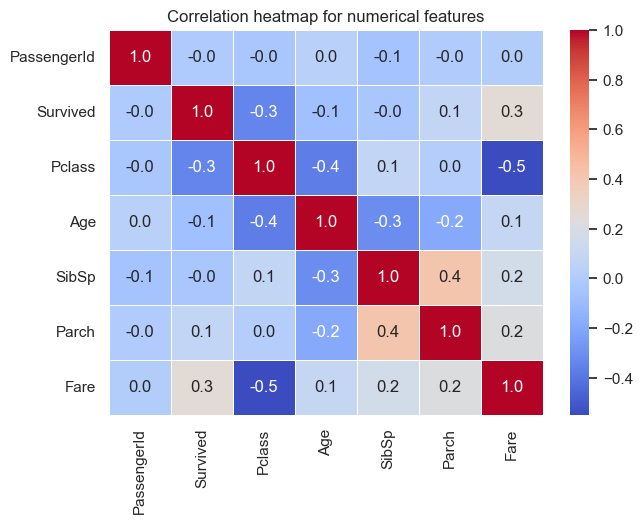

In [132]:
#Correlation heat map for numerical features
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(train_df.select_dtypes(include=['int64', 'float64']).corr(), annot=True , cmap='coolwarm' , fmt='.1f' , linewidth=.6)
plt.title('Correlation heatmap for numerical features')
plt.show()

0    549
1    342
Name: Survived, dtype: int64

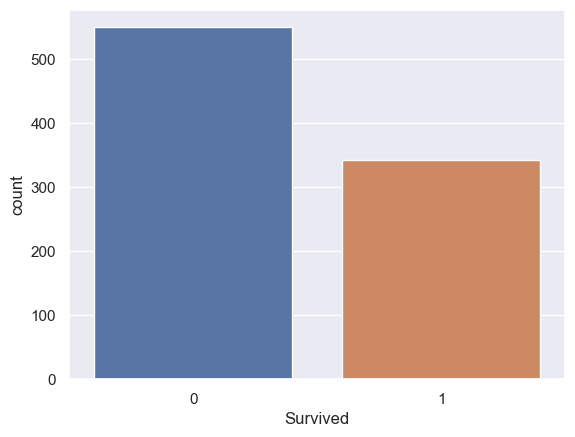

In [133]:
sns.set()
sns.countplot('Survived' , data=train_df )
train_df['Survived'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

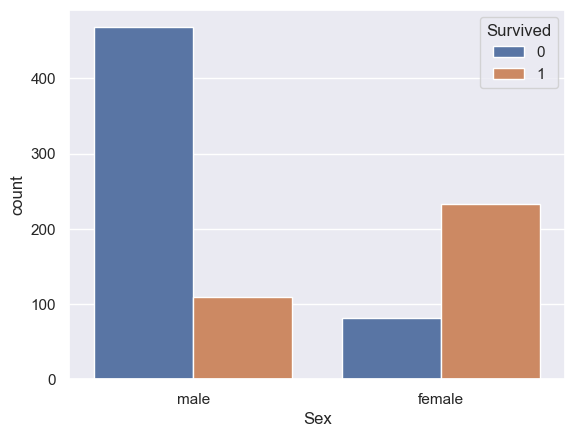

In [134]:
sns.countplot(x='Sex' , hue='Survived', data=train_df)
train_df['Sex'].value_counts()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

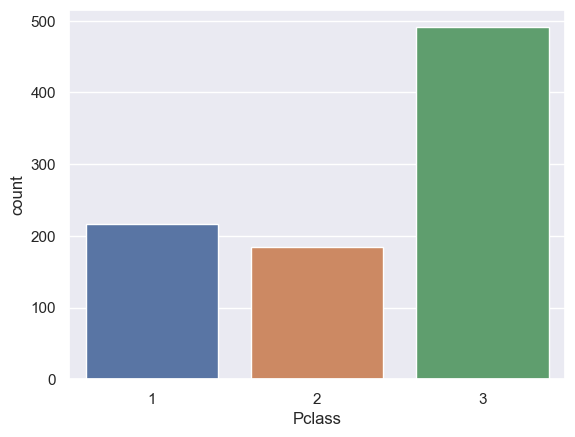

In [135]:
sns.countplot('Pclass', data=train_df )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

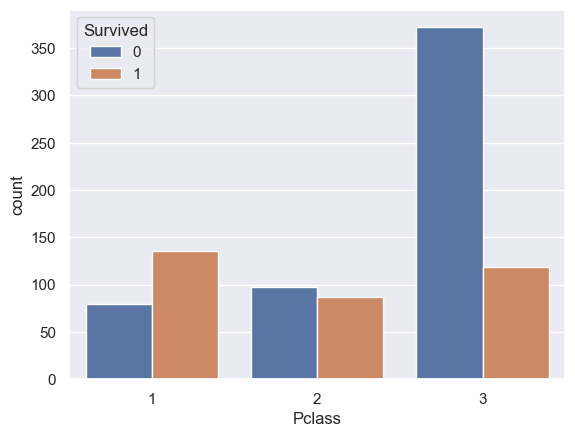

In [136]:
sns.countplot(x='Pclass' , hue='Survived', data=train_df)

# 3-Data Preprocessing

In [137]:
#missing data in train_df
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [138]:
#missing data in train_df
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,327.0,0.367003
Age,86.0,0.096521
Fare,1.0,0.001122
PassengerId,0.0,0.000000
Pclass,0.0,0.000000
Name,0.0,0.000000
Sex,0.0,0.000000
SibSp,0.0,0.000000
Parch,0.0,0.000000
Ticket,0.0,0.000000


In [140]:
def preprocess_data(data):
    
    # Drop unnecessary columns
    data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1 ,inplace=True)
    
    # Fill missing values in 'Age' and 'Fare' with mean
    data["Age"].fillna(data["Age"].mean(), inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    
    # Fill missing values in 'Embarked' with mode value (most repeated--> S)
    data["Embarked"].fillna(data["Embarked"].mode()[0] , inplace=True)
    
    # Convert categorical variables into numerical
    data = pd.get_dummies(data, columns=["Sex", "Embarked"])
    

    return data

In [141]:
# Apply preprocessing to training and test data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# 4-Models

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
#Split the training data into Training and Testing 

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

In [144]:
# Split the training data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [145]:
#Decision Tree

DecisionTree = DecisionTreeClassifier(max_depth=11,random_state=33)
DecisionTree.fit(X_train,y_train)

# Evaluate the model
print(' Train Score is : ' , DecisionTree.score(X_train, y_train))
print(' Test  Score is : ' , DecisionTree.score(X_test, y_test))
acc_decision_tree = DecisionTree.score(X_test, y_test)

 Train Score is :  0.9283707865168539
 Test  Score is :  0.8100558659217877


In [146]:
#Random Forest 

RandomForest = RandomForestClassifier(n_estimators=50,max_depth=25,random_state=33)
RandomForest.fit(X_train,y_train)

# Evaluate the model
print(' Train Score is : ' , RandomForest.score(X_train, y_train))
print(' Test  Score is : ' , RandomForest.score(X_test, y_test))
acc_random_forest = RandomForest.score(X_test, y_test)

 Train Score is :  0.9803370786516854
 Test  Score is :  0.8268156424581006


In [147]:
#Gradient Boosting Classifier

GBC = GradientBoostingClassifier( n_estimators=100,max_depth=5)

GBC.fit(X_train,y_train)

# Evaluate the model
print(' Train Score is : ' , GBC.score(X_train, y_train))
print(' Test  Score is : ' , GBC.score(X_test, y_test))
acc_gbc = GBC.score(X_test, y_test)

 Train Score is :  0.9620786516853933
 Test  Score is :  0.8324022346368715


In [148]:
#LogisticRegressior

LogisticRegress = LogisticRegression(C=1.0, max_iter=200)
LogisticRegress.fit(X_train, y_train)

# Evaluate the model
print(' Train Score is : ' , LogisticRegress.score(X_train, y_train))
print(' Test  Score is : ' , LogisticRegress.score(X_test, y_test))
acc_log = LogisticRegress.score(X_test, y_test)

 Train Score is :  0.8019662921348315
 Test  Score is :  0.8100558659217877


In [149]:
models = pd.DataFrame({
    'Models': [ 'Logistic Regression', 'Random Forest', 'Gradient Boosting Classifier', 'Decision Tree'],
    'Test Score': [acc_log, acc_random_forest ,acc_gbc, acc_decision_tree]})

models.sort_values(by='Test Score', ascending=False)

,Models,Test Score
2,Gradient Boosting Classifier,0.832402
1,Random Forest,0.826816
0,Logistic Regression,0.810056
3,Decision Tree,0.810056


In [160]:
# Make predictions on the test data
predictions = LogisticRegress.predict(test_df)


predictions = pd.DataFrame({
    "PassengerId": range(892, 892 + len(predictions)),
    "Survived": predictions
})

predictions.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [161]:
predictions.to_csv("Titanic submission.csv", index=False)